In [2]:
######################################################################
setwd("../Data")
load("mydrias.RData")

In [5]:
head(mydrias)

,idpt,doi,date,lat,lon,alti,Tn,Tx,Tm,RR,ETP,kcc,kcl,kcs,ETM,ru_mean,ru_majorit
,<int>,<int>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9378,1,01/01/1975,46.2218,3.94455,302,-3.32,2.16,-0.78,0.00,0.3786427,0.20,0.2000000,0.1999332,0.07572854,103.8224,106
2,9378,312,08/11/1983,46.2218,3.94455,302,5.10,12.83,10.09,7.66,0.9535886,0.35,0.2338710,0.2161277,0.22301669,103.8224,106
3,9378,292,18/10/1980,46.2218,3.94455,302,1.77,5.78,4.07,0.22,0.7303612,0.35,0.3306452,0.3184270,0.24149039,103.8224,106
4,9378,155,04/06/1975,46.2218,3.94455,302,8.64,15.23,12.49,0.18,2.9612793,0.68,1.0154839,1.0477081,3.00713141,103.8224,106
5,9378,286,13/10/1979,46.2218,3.94455,302,5.53,18.93,11.50,0.00,2.0166078,0.65,0.3700000,0.3672705,0.74614489,103.8224,106
6,9378,363,29/12/1983,46.2218,3.94455,302,-2.14,9.90,3.76,0.00,0.6968727,0.20,0.2000000,0.2013706,0.13937454,103.8224,106


In [6]:
## Charge la fonction du modèle de bilan hydrique à 2 réservoirs
source("../FonctionsR/FonctionBilanHydrique2R.R")

In [8]:
## Partition de la RU en 2 réservoirs
mydrias$RU1 <- mydrias$ru_mean * 0.4 ## réservoir superfiel
mydrias$RU2 <- mydrias$ru_mean * 0.6 ## réservoir profond

In [9]:
head(mydrias)
## que voyez vous concernant l'ordre des dates ?

,idpt,doi,date,lat,lon,alti,Tn,Tx,Tm,RR,ETP,kcc,kcl,kcs,ETM,ru_mean,ru_majorit,RU1,RU2
,<int>,<int>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9378,1,01/01/1975,46.2218,3.94455,302,-3.32,2.16,-0.78,0.00,0.3786427,0.20,0.2000000,0.1999332,0.07572854,103.8224,106,41.52894,62.29341
2,9378,312,08/11/1983,46.2218,3.94455,302,5.10,12.83,10.09,7.66,0.9535886,0.35,0.2338710,0.2161277,0.22301669,103.8224,106,41.52894,62.29341
3,9378,292,18/10/1980,46.2218,3.94455,302,1.77,5.78,4.07,0.22,0.7303612,0.35,0.3306452,0.3184270,0.24149039,103.8224,106,41.52894,62.29341
4,9378,155,04/06/1975,46.2218,3.94455,302,8.64,15.23,12.49,0.18,2.9612793,0.68,1.0154839,1.0477081,3.00713141,103.8224,106,41.52894,62.29341
5,9378,286,13/10/1979,46.2218,3.94455,302,5.53,18.93,11.50,0.00,2.0166078,0.65,0.3700000,0.3672705,0.74614489,103.8224,106,41.52894,62.29341
6,9378,363,29/12/1983,46.2218,3.94455,302,-2.14,9.90,3.76,0.00,0.6968727,0.20,0.2000000,0.2013706,0.13937454,103.8224,106,41.52894,62.29341


In [10]:
## Création de l'objet idpt qui contient les identifiants
## des points de grille Drias
idpt <- unique(mydrias$idpt)

In [11]:
length(idpt)

[1] 497

In [12]:
## Création d'un liste vide qui va contenir les résultats
## la liste a autant d'éléments que de points de grille
resuBH <- vector("list", length(idpt))

### Calcul du BH : version séquentielle i.e. traite les points les uns à
## la suite des autres via une boucle for

cpt <-1 ## initialisation d'un compteur pour le remplissage de la liste
for(i in idpt){ ## Boucle du calcul du BH pour chaque point de grille
    print(i)
    tmp <- subset(mydrias,idpt==i)
    ## construction du vecteur date. Odre jour, mois, années à adapter
    ## en fonction de l'ordre dans lequel sont vos dates
    tmp$date <- as.Date(tmp$date,"%d/%m/%Y")
    ## ordonne les données par date
    tmp <- tmp[order(tmp$date),]
    # application du modèle sur tout la période
    BH.tmp <- BH2R(RR=tmp$RR,ETM=tmp$ETM,RU1=tmp$RU1[1],RU2=tmp$RU2[1])
    ## remplissage de la liste avec les résultats
    resuBH[[cpt]] <- BH.tmp
    cpt <- cpt+1    
}

[1] 9378
[1] 9379
[1] 9380
[1] 9381
[1] 9382
[1] 9386
[1] 9521
[1] 9522
[1] 9523
[1] 9524
[1] 9525
[1] 9529
[1] 9665
[1] 9666
[1] 9667
[1] 9668
[1] 9669
[1] 9670
[1] 9671
[1] 9672
[1] 9808
[1] 9809
[1] 9810
[1] 9811
[1] 9812
[1] 9813
[1] 9814
[1] 9815
[1] 9816
[1] 9950
[1] 9951
[1] 9952
[1] 9953
[1] 9954
[1] 9955
[1] 9956
[1] 9957
[1] 9958
[1] 9959
[1] 9963
[1] 9964
[1] 10091
[1] 10092
[1] 10093
[1] 10094
[1] 10095
[1] 10096
[1] 10097
[1] 10098
[1] 10099
[1] 10100
[1] 10101
[1] 10102
[1] 10103
[1] 10104
[1] 10105
[1] 10106
[1] 10234
[1] 10235
[1] 10236
[1] 10237
[1] 10238
[1] 10239
[1] 10240
[1] 10241
[1] 10242
[1] 10243
[1] 10244
[1] 10245
[1] 10246
[1] 10247
[1] 10248
[1] 10249
[1] 10250
[1] 10371
[1] 10372
[1] 10373
[1] 10374
[1] 10375
[1] 10376
[1] 10377
[1] 10378
[1] 10379
[1] 10380
[1] 10381
[1] 10382
[1] 10383
[1] 10384
[1] 10385
[1] 10386
[1] 10387
[1] 10388
[1] 10389
[1] 10390
[1] 10391
[1] 10392
[1] 10514
[1] 10515
[1] 10516
[1] 10517
[1] 10518
[1] 10519
[1] 10520
[1] 10521
[

In [13]:
ls()

[1] "BH.tmp"  "BH2R"    "cpt"     "i"       "idpt"    "mydrias" "resuBH" 
[8] "tmp"

In [14]:
save(resuBH, file="resuBH_historic.RData")

In [16]:
BH.9378 <- resuBH[[1]]
head(BH.9378)

,RR,ETM,R1,R2,ETR1,ETR2,DR1,DR2,RR1,RR2,Ec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00,0.07572854,41.45321,62.29341,0.07572854,0,0.07572854,0,0.0000000,0,NA
2,0.00,0.08248246,41.37073,62.29341,0.08248246,0,0.15821099,0,0.0000000,0,NA
3,0.00,0.04607550,41.32466,62.29341,0.04607550,0,0.20428649,0,0.0000000,0,NA
4,0.00,0.06438574,41.26027,62.29341,0.06438574,0,0.26867223,0,0.0000000,0,NA
5,1.06,0.07788767,41.52894,62.29341,0.07788767,0,0.34655989,0,0.3465599,0,0.7134401
6,0.00,0.09574946,41.43319,62.29341,0.09574946,0,0.09574946,0,0.0000000,0,NA


In [17]:
BH.1an <- BH.9378[1:365,]
BH.1an$BH <- (BH.1an$R1 + BH.1an$R2)/(BH.1an$R1[1] + BH.1an$R2[1])

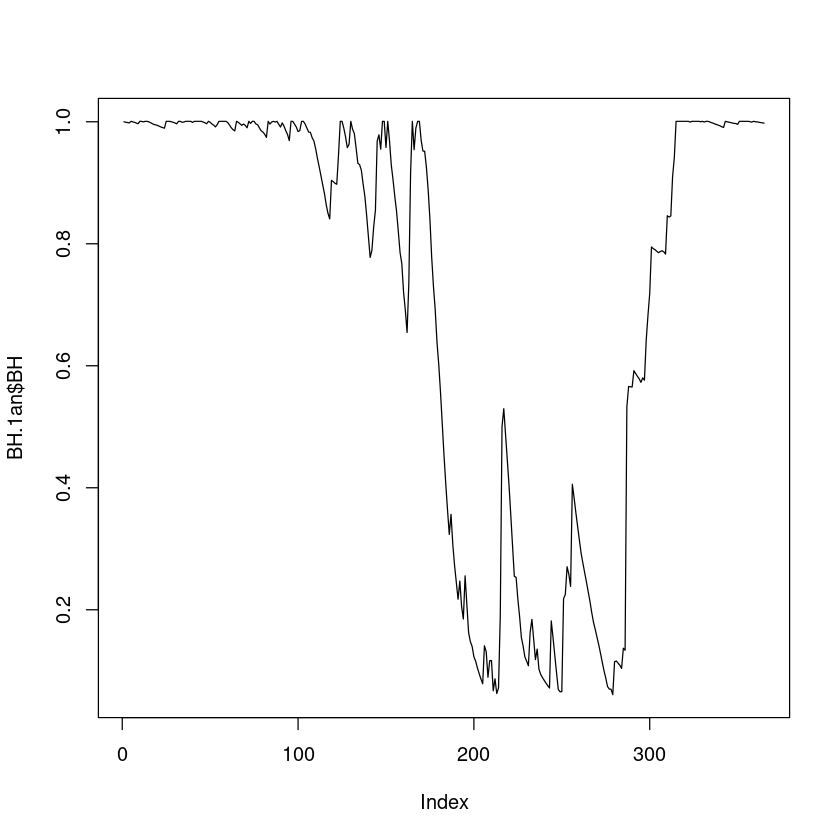

In [18]:
plot(BH.1an$BH, type = "l")

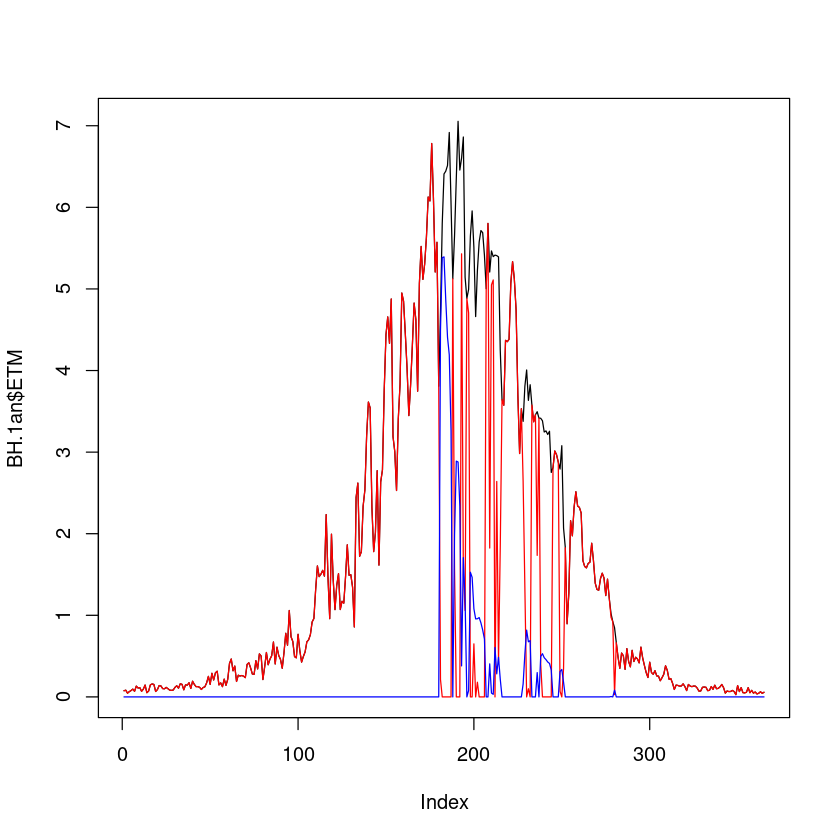

In [19]:
## Partition ETM
plot(BH.1an$ETM, type="l")
lines(BH.1an$ETR1, col="red")
lines(BH.1an$ETR2, col="blue")